# In this notebook we plan the fix-priority path for two agents on the hybrid graph and animate the result.

In [2]:
import sys
sys.path.append('../../')
from panav.env import NavigationEnv, Box2DRegion, box_2d_center
from panav.hybrid import HybridGraph
from panav.viz import draw_env,draw_hybrid

import networkx as nx
import numpy as np
from matplotlib import pyplot as plt

%load_ext autoreload
%autoreload 2

In [4]:


# 2D navigation environment

start_box_side = np.array([1,1])
goal_box_side = np.array([1,1])

top, bottom = 9,-9
start_x_offset = 7
goal_x_offset = 9
N = 4

start_locs = np.vstack([
np.vstack([np.ones(N)*start_x_offset,np.linspace(top,bottom, N)]).T,
np.vstack([np.ones(N)*(-start_x_offset),np.linspace(top,bottom, N)]).T])

goal_locs = np.vstack([
np.vstack([np.ones(N)*(-goal_x_offset),np.linspace(bottom,top, N)]).T,
np.vstack([np.ones(N)*goal_x_offset,np.linspace(bottom,top, N)]).T])


starts = [box_2d_center(s,start_box_side) for s in start_locs]
goals = [box_2d_center(g,goal_box_side) for g in goal_locs]
limits = [(-10.0,10.0),(-10.0,10.0)]


# O1 = Box2DRegion((-5.0,-0.5),(0.5,10))
# O2 = Box2DRegion((-0.0,5.0),(-10,-1.0))
# env = NavigationEnv(limits,[O1,O2],starts,goals)


O1 = Box2DRegion((-2.5,2.5),(0.5,10))
# O1 = Box2DRegion((-2.5,2.5),(2.0,10))
O2 = Box2DRegion((-2.5,2.5),(-10,-1.0))
env = NavigationEnv(limits,[O1,O2],starts,goals)


# O1 = Box2DRegion((-2.5,2.5),(0.5,10))
# O2 = Box2DRegion((-2.5,2.5),(-3,-1.0))
# O3 = Box2DRegion((-2.5,2.5),(-10.0,-4.0))
# env = NavigationEnv(limits,[O1,O2,O3],starts,goals)


# Construct the hybrid graph representation of the environment
bloating_r = 0.5 
HG =  HybridGraph(env,bloating_r,K = 4)


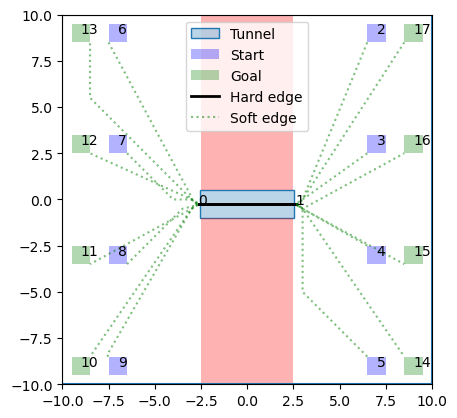

In [5]:
ax = plt.gca()
draw_hybrid(HG,ax)
plt.show()    

In [6]:
from panav.PBS.PBS_hybrid_SIPP import PBS_hybrid_SIPP
(g_joint_plan, c_joint_plan),cost = PBS_hybrid_SIPP(HG)

/Users/tianpengzhang/opt/miniconda3/envs/PA-Nav/lib/python3.11/site-packages/cvxpy/problems/problem.py:1391: UserWarning: 
    The problem is either infeasible or unbounded, but the solver
    cannot tell which. Disable any solver-specific presolve methods
    and re-solve to determine the precise problem status.

    For GUROBI and CPLEX you can automatically perform this re-solve
    with the keyword argument prob.solve(reoptimize=True, ...).
    
  warnings.warn(INF_OR_UNB_MESSAGE)


In [8]:
from panav.viz import animation,interpolate_positions

from IPython.display import HTML, display
interp_dt = 0.1

pos = []
for cp in c_joint_plan:
    _,xs = interpolate_positions(*cp,interp_dt)
    pos.append(xs)

anim = animation(env, pos, bloating_r, dt = interp_dt / 4)
# display(HTML(anim.to_jshtml()))
anim.save("../Figures/HybridPBS_exec.gif")
plt.close()   # Avoid plotting an extra figure.

# Other enviroments

## Unicorn

In [5]:
from panav.env import PolygonRegion
start_box_side = np.array([1,1])
goal_box_side = np.array([1,1])

top, bottom = 6,-6
start_x_offset = 5 
goal_x_offset = 7
N = 4

start_locs = np.vstack([
np.vstack([np.ones(N)*start_x_offset,np.linspace(top,bottom, N)]).T,
np.vstack([np.ones(N)*(-start_x_offset),np.linspace(top,bottom, N)]).T])

goal_locs = np.vstack([
np.vstack([np.ones(N)*(-goal_x_offset),np.linspace(bottom,top, N)]).T,
np.vstack([np.ones(N)*goal_x_offset,np.linspace(bottom,top, N)]).T])

starts = [box_2d_center(s,start_box_side) for s in start_locs]
goals = [box_2d_center(g,goal_box_side) for g in goal_locs]



start_box_side = np.array([1,1])
goal_box_side = np.array([1,1])

o1 = Box2DRegion((-2.5,2.5),(2.5,5))
o2 = Box2DRegion((-2.5,2.5),(-5,-2.5))
o3 = PolygonRegion([(3.0,1.0),(3.0,-1.0),(7.5,0)])

obstacles = [o1,o2,o3]

limits = [(-10.0,10.0),(-10.0,10.0)]

bloating_r = 0.5 

env = NavigationEnv(limits,obstacles,starts,goals)

Set parameter Username
Academic license - for non-commercial use only - expires 2024-01-18


/Users/tianpengzhang/opt/miniconda3/envs/PA-Nav/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


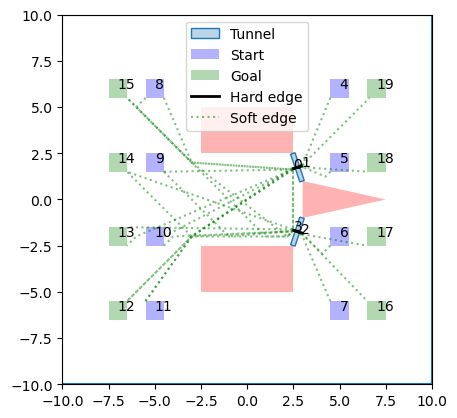

In [6]:
# Construct the hybrid graph representation of the environment
bloating_r = 0.5 
HG =  HybridGraph(env,bloating_r,K = 4)
ax = plt.gca()
draw_hybrid(HG,ax)
plt.show()    

In [7]:
from panav.PBS.PBS_hybrid_SIPP import PBS_hybrid_SIPP
(g_joint_plan, c_joint_plan),cost = PBS_hybrid_SIPP(HG)

In [8]:
from panav.viz import animation,interpolate_positions

from IPython.display import HTML, display
interp_dt = 0.1

pos = []
for cp in c_joint_plan:
    _,xs = interpolate_positions(*cp,interp_dt)
    pos.append(xs)

anim = animation(env, pos, bloating_r, dt = interp_dt / 4)
# display(HTML(anim.to_jshtml()))
anim.save("../Figures/HybridPBS_unicorn.gif")
plt.close()   # Avoid plotting an extra figure.

## Double tunnel

In [10]:


# 2D navigation environment

start_box_side = np.array([1,1])
goal_box_side = np.array([1,1])

top, bottom = 9,-9
start_x_offset = 7
goal_x_offset = 9
N = 4

start_locs = np.vstack([
np.vstack([np.ones(N)*start_x_offset,np.linspace(top,bottom, N)]).T,
np.vstack([np.ones(N)*(-start_x_offset),np.linspace(top,bottom, N)]).T])

goal_locs = np.vstack([
np.vstack([np.ones(N)*(-goal_x_offset),np.linspace(bottom,top, N)]).T,
np.vstack([np.ones(N)*goal_x_offset,np.linspace(bottom,top, N)]).T])


starts = [box_2d_center(s,start_box_side) for s in start_locs]
goals = [box_2d_center(g,goal_box_side) for g in goal_locs]
limits = [(-10.0,10.0),(-10.0,10.0)]


# O1 = Box2DRegion((-5.0,-0.5),(0.5,10))
# O2 = Box2DRegion((-0.0,5.0),(-10,-1.0))
# env = NavigationEnv(limits,[O1,O2],starts,goals)


# O1 = Box2DRegion((-2.5,2.5),(0.5,10))
# # O1 = Box2DRegion((-2.5,2.5),(2.0,10))
# O2 = Box2DRegion((-2.5,2.5),(-10,-1.0))
# env = NavigationEnv(limits,[O1,O2],starts,goals)


O1 = Box2DRegion((-2.5,2.5),(0.5,10))
O2 = Box2DRegion((-2.5,2.5),(-3,-1.0))
O3 = Box2DRegion((-2.5,2.5),(-10.0,-4.0))
env = NavigationEnv(limits,[O1,O2,O3],starts,goals)


# Construct the hybrid graph representation of the environment
bloating_r = 0.5 
HG =  HybridGraph(env,bloating_r,K = 4)


/Users/tianpengzhang/opt/miniconda3/envs/PA-Nav/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


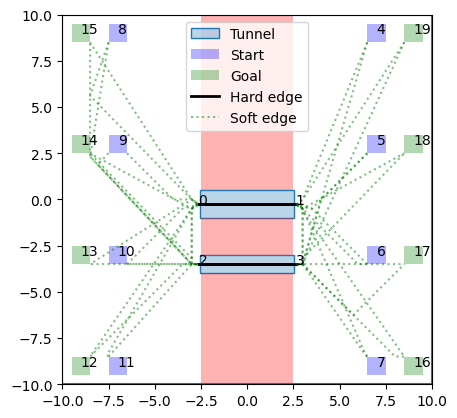

In [11]:
# Construct the hybrid graph representation of the environment
bloating_r = 0.5 
HG =  HybridGraph(env,bloating_r,K = 4)
ax = plt.gca()
draw_hybrid(HG,ax)
plt.show()    

In [12]:
from panav.PBS.PBS_hybrid_SIPP import PBS_hybrid_SIPP
(g_joint_plan, c_joint_plan),cost = PBS_hybrid_SIPP(HG)

In [13]:
from panav.viz import animation,interpolate_positions

from IPython.display import HTML, display
interp_dt = 0.1

pos = []
for cp in c_joint_plan:
    _,xs = interpolate_positions(*cp,interp_dt)
    pos.append(xs)

anim = animation(env, pos, bloating_r, dt = interp_dt / 4)
# display(HTML(anim.to_jshtml()))
anim.save("../Figures/HybridPBS_double.gif")
plt.close()   # Avoid plotting an extra figure.

## 10 agents

In [15]:


# 2D navigation environment

start_box_side = np.array([1,1])
goal_box_side = np.array([1,1])

top, bottom = 6,-6
start_x_offset = 7
goal_x_offset = 9
N = 5

start_locs = np.vstack([
np.vstack([np.ones(N)*start_x_offset,np.linspace(top,bottom, N)]).T,
np.vstack([np.ones(N)*(-start_x_offset),np.linspace(top,bottom, N)]).T])

goal_locs = np.vstack([
np.vstack([np.ones(N)*(-goal_x_offset),np.linspace(bottom,top, N)]).T,
np.vstack([np.ones(N)*goal_x_offset,np.linspace(bottom,top, N)]).T])


starts = [box_2d_center(s,start_box_side) for s in start_locs]
goals = [box_2d_center(g,goal_box_side) for g in goal_locs]
limits = [(-10.0,10.0),(-10.0,10.0)]


# O1 = Box2DRegion((-5.0,-0.5),(0.5,10))
# O2 = Box2DRegion((-0.0,5.0),(-10,-1.0))
# env = NavigationEnv(limits,[O1,O2],starts,goals)


O1 = Box2DRegion((-2.5,2.5),(0.5,10))
# O1 = Box2DRegion((-2.5,2.5),(2.0,10))
O2 = Box2DRegion((-2.5,2.5),(-10,-1.0))
env = NavigationEnv(limits,[O1,O2],starts,goals)



# O1 = Box2DRegion((-2.5,2.5),(0.5,10))
# O2 = Box2DRegion((-2.5,2.5),(-3,-1.0))
# O3 = Box2DRegion((-2.5,2.5),(-10.0,-4.0))
# env = NavigationEnv(limits,[O1,O2,O3],starts,goals)


# Construct the hybrid graph representation of the environment
bloating_r = 0.5 
HG =  HybridGraph(env,bloating_r,K = 4)


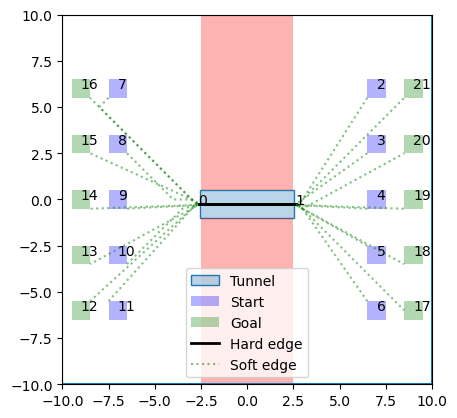

In [16]:
# Construct the hybrid graph representation of the environment
bloating_r = 0.5 
HG =  HybridGraph(env,bloating_r,K = 4)
ax = plt.gca()
draw_hybrid(HG,ax)
plt.show()    

In [17]:
from panav.PBS.PBS_hybrid_SIPP import PBS_hybrid_SIPP
(g_joint_plan, c_joint_plan),cost = PBS_hybrid_SIPP(HG)

In [18]:
from panav.viz import animation,interpolate_positions

from IPython.display import HTML, display
interp_dt = 0.1

pos = []
for cp in c_joint_plan:
    _,xs = interpolate_positions(*cp,interp_dt)
    pos.append(xs)

anim = animation(env, pos, bloating_r, dt = interp_dt / 4)
# display(HTML(anim.to_jshtml()))
anim.save("../Figures/HybridPBS_ten.gif")
plt.close()   # Avoid plotting an extra figure.